In [42]:
import numpy as np
import pygimli as pg 
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt
import matplotlib.pyplot as plt

In [2]:
data = tt.load("refraccion_curso/refraccion_1/picks/refraccion_1_picks.sgt")

In [3]:
print(data)

Data: Sensors: 33 data: 216, nonzero entries: ['g', 's', 't', 'valid']


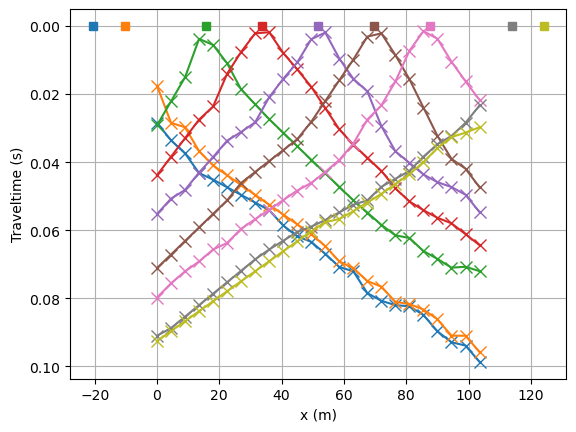

In [4]:
tt.show(data)

In [5]:
import seaborn as sns

<Axes: ylabel='Count'>

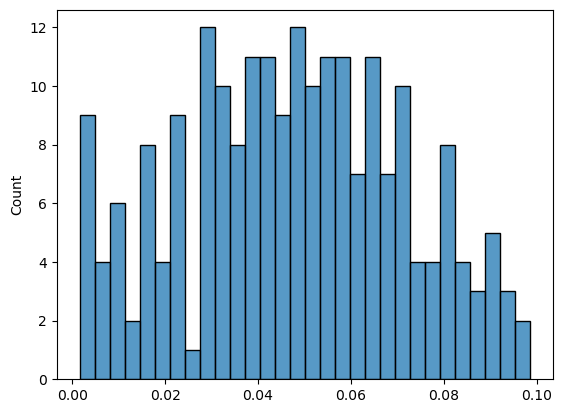

In [6]:
sns.histplot(data['t'], bins=30)

<Axes: ylabel='Density'>

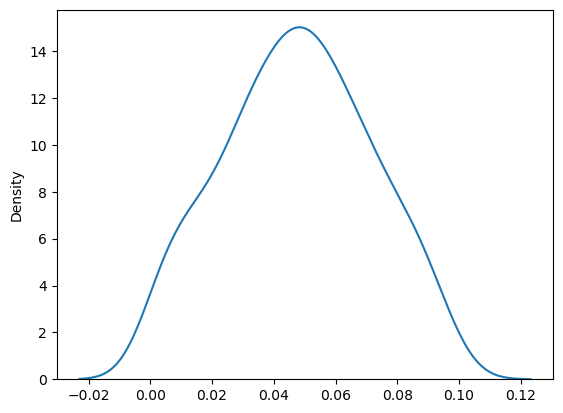

In [7]:
sns.kdeplot(data['t'])

In [9]:
np.unique(data['g'])

array([ 0,  1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 15, 16, 17, 18, 20,
       21, 22, 23, 25, 26, 27, 28])

In [47]:
mgr = tt.TravelTimeManager(data)

(<Axes: >, None)

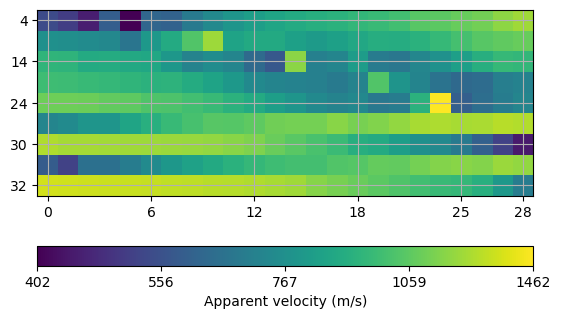

In [49]:
mgr.showData()

In [50]:
inv = mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, verbose=1)

15/02/24 - 22:58:54 - pyGIMLi - INFO - Found 1 regions.
15/02/24 - 22:58:54 - pyGIMLi - INFO - Found 1 regions.
15/02/24 - 22:58:54 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(d:\Anaconda\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
15/02/24 - 22:58:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 22:58:54 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
15/02/24 - 22:58:54 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
15/02/24 - 22:58:54 - pyGIMLi - INFO - Created startmodel from forward operator: 2860, min/max=0.000200/0.002000
15/02/24 - 22:58:54 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001F5368A36D0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001F5368A3810>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001F536AB30A0>
min/max (data): 0.0015/0.1
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   78.72
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.66 (dPhi = 92.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.86 (dPhi = 47.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.74 (dPhi = 36.24%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.28 (dPh

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f54a9c7eb0>)

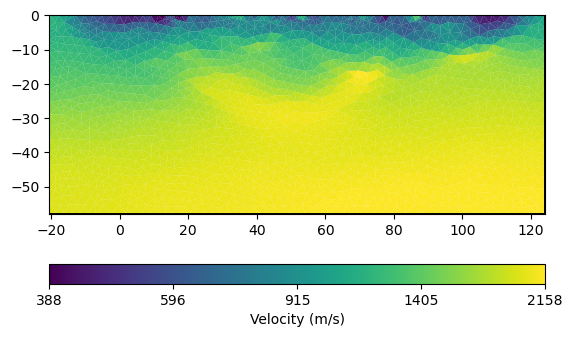

In [51]:
mgr.showResult(logscale=False)

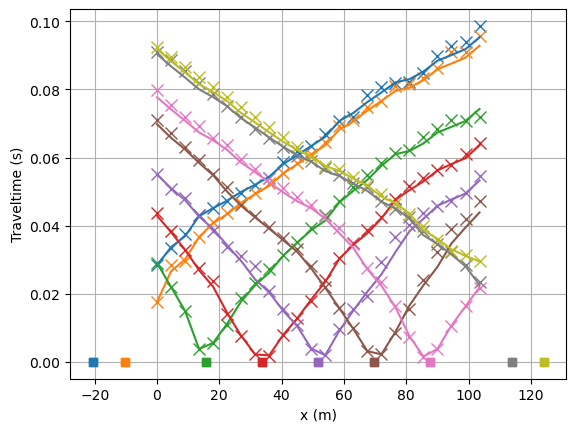

In [52]:
mgr.showFit()

<Axes: ylabel='Count'>

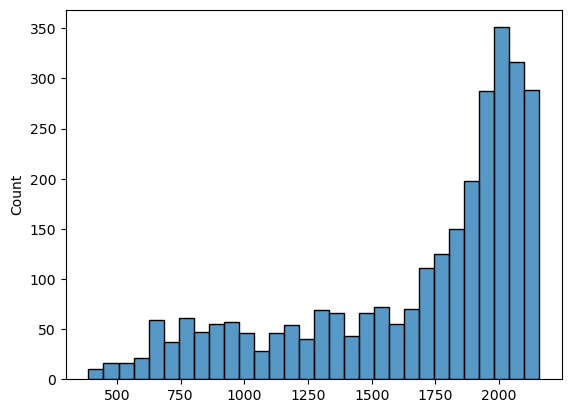

In [53]:
sns.histplot(inv, bins=30)

<Axes: ylabel='Density'>

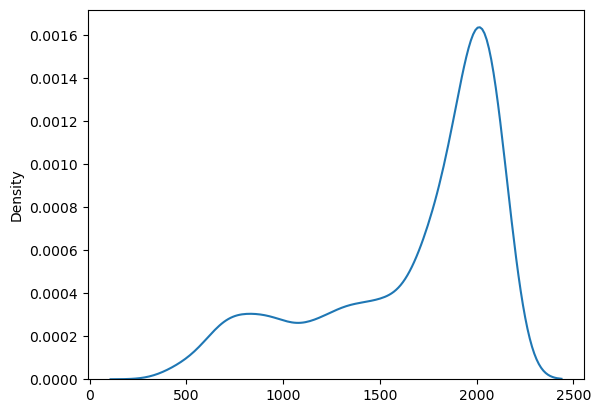

In [54]:
sns.kdeplot(inv)